$H(f,f_n,\zeta)=\frac{1}{(2\pi)^2(f^2-f_n^2+j2\zeta f f_n)}$

$|H(f,f_n,\zeta)|=\frac{1}{(2\pi)^2\sqrt{((f^2-f_n^2)^2+(2\zeta f f_n)^2)}}$

$z(f,f_n,\zeta)=|H(f,f_n,\zeta)| \ddot{y}(f,f_n,\zeta)$

$W_{z}(f,f_n,\zeta)=|H(f,f_n,\zeta)|^2W_{\ddot{y}}(f)$

$S_a=K\cdot |z|$

$W_{S_a}(f,f_n,\zeta)=K^2 \cdot W_{z}(f,f_n,\zeta)$

$M_n=\int_0^{\infty} f^nW(f)df$

## 1. BLWN

$W_{\ddot{y}}(f)=\begin{cases}
A && f_1 \leq f \leq f_2 \\
0 && otherwise
\end{cases}$

$W_{z}(f)=\begin{cases}
A\frac{1}{(2\pi)^4((f^2-f_n^2)^2+(2\zeta f f_n)^2)} && f_1 \leq f \leq f_2 \\
0 && otherwise
\end{cases}$

$W_{S_a}(f,f_n,\zeta)=AK^2\frac{1}{(2\pi)^4((f^2-f_n^2)^2+(2\zeta f f_n)^2)}$

### 1.1 Moments

$M_0=A\frac{K^2}{(2\pi)^4}\int_{f_1}^{f_2}\frac{1}{(f^2-f_n^2)^2+(2\zeta f f_n)^2}df$

In [72]:
from sympy import *

init_printing()
f, fn, z, f1, f2= symbols('f fn zeta f1 f2')

In [73]:
expr1 = (f**2-fn**2)**2+(2*z*f*fn)**2

In [74]:
expr=1/expr1

In [75]:
expr2 = f**2 + 2*sqrt(1-z**2)*f*fn+ fn**2
expr3 = f**2 - 2*sqrt(1-z**2)*f*fn + fn**2

In [76]:
expand(expr2*expr3)

In [77]:
expand(expr1)

In [78]:
A,B=symbols('A B')

In [79]:
expr4=(A*f+B*fn)/expr2-(A*f-B*fn)/expr3

In [80]:
expr5=cancel(expr4)

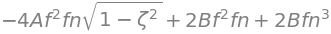

In [81]:
numer(expr5)

In [82]:
eq=Eq(numer(expr5),1)

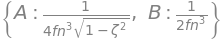

In [83]:
solve_undetermined_coeffs(eq, [A,B], f)

In [84]:
A=1/(4*fn**3*sqrt(1-z**2))
B=1/(2*fn**3)

In [85]:
expr1= (A*f+B*fn)/expr2
expr2= (A*f-B*fn)/expr3

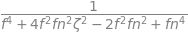

In [89]:
simplify((expr1-expr2))

In [97]:
expr3=integrate(expr1,f,manual=True)

In [98]:
expr4=integrate(expr2,f,manual=True)

In [99]:
iexpr=expr3-expr4

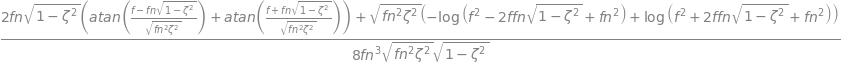

In [100]:
simplify(iexpr)

In [102]:
def aaa(a,b,c):
    return iexpr.subs([(f,a),(fn,b),(z,c)])

In [104]:
aaa(100,10,0.02)-aaa(1,10,0.02)